In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import dirname, join as pjoin
import scipy.io as sio

In [30]:
matstruct_fname = pjoin('MinRho.mat')
matstruct_contents = sio.loadmat(matstruct_fname)
rho = matstruct_contents['MinRho']

In [5]:
np.shape(rho)

(1, 400)

In [31]:
psi = np.reshape(rho[0,:], [25,25]) #14
psi = np.transpose(psi)
A = Qobj(psi)

In [30]:
print(psi[2][4])

0j


In [13]:
#psi = np.array([[0,0,0],[0,1,0],[0,0,0]])
x = np.linspace(-4,4,200)

In [32]:
Wig = wigner(A, x, x)

In [27]:
Wig.min()

-0.22039857027316717

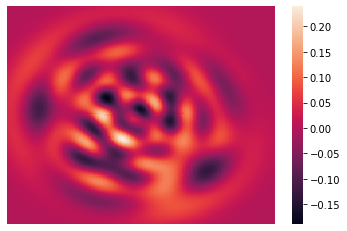

In [33]:
figure = sns.heatmap(Wig, yticklabels=False, xticklabels=False)
fig = figure.get_figure()
#fig.savefig('SqStateWignerFunction.pdf', format='pdf')

In [34]:
import scipy.io

scipy.io.savemat('SecMinErrorWig.mat', {'Wig': Wig})

In [7]:
savefig('sample.pdf')

NameError: name 'savefig' is not defined

Yay
Yay
Yay
Yay
Yay
Yay
Yay
Yay
Yay
Yay
Yay
Yay
Yay
Yay
Yay
Yay
Yay
Yay
Yay


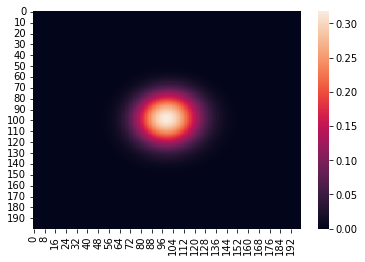

In [7]:
from matplotlib import animation

fig = plt.figure()
A = np.reshape(rho[0,:], [20,20])
B = Qobj(A)
Wig1 = wigner(B, x, x)
sns.heatmap(Wig1)

def init():
    sns.heatmap(np.zeros((100,100)), cbar=False)

def animate(i):
    psi = np.reshape(rho[i*10,:], [20,20])
    B2 = Qobj(psi)
    Wig = wigner(B2, x, x)
    sns.heatmap(Wig, cbar=False)
    print('Yay')

    
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=19, repeat=False)

savefile = r"Dephased.gif"
pillowwriter = animation.PillowWriter(fps=3)
anim.save(savefile, writer=pillowwriter)

plt.show()

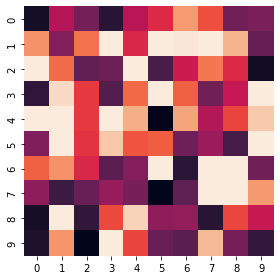

In [47]:
fig = plt.figure()
def init():
    sns.heatmap(np.zeros((10, 10)), vmax=.8, square=True, cbar=False)

def animate(i):
    data = data_list[i]
    sns.heatmap(data, vmax=.8, square=True, cbar=False)

data_list = []
for j in range(20):
    data = np.random.rand(10, 10)
    data_list.append(data)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=2, repeat = False)

savefile = r"test3.gif"
pillowwriter = animation.PillowWriter(fps=1)
anim.save(savefile, writer=pillowwriter)

plt.show()

Below is to plot the Wigner functions of coherent/incoherent cat states

In [25]:
matstruct_fname = pjoin('CohState.mat')
matstruct_contents = sio.loadmat(matstruct_fname)
rho = matstruct_contents['R']

<AxesSubplot:>

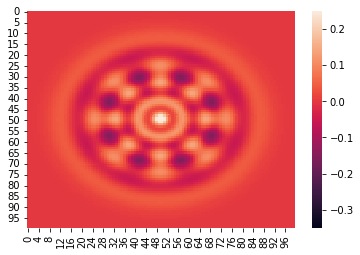

In [26]:
A = Qobj(rho)
x = np.linspace(-5,5,100)
Wig = wigner(A, x, x)
sns.heatmap(Wig, cbar = True, vmin = -.35, vmax = 0.25)

<AxesSubplot:>

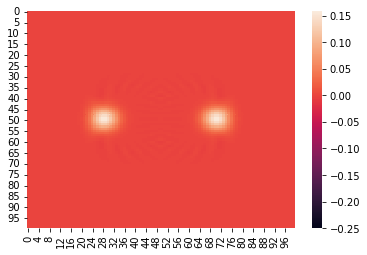

In [12]:
matstruct_fname = pjoin('CohState.mat')
matstruct_contents = sio.loadmat(matstruct_fname)
rho2 = matstruct_contents['R']
A2 = Qobj(rho2)
x = np.linspace(-10,10,100)
Wig2 = wigner(A2, x, x)
sns.heatmap(Wig2, cbar = True, vmin = -0.25, vmax = 0.16)

In [47]:
A = np.zeros((1,2))
A

array([[0., 0.]])

In [3]:
import scipy.io

# Reading matlab data
matstruct_fname = pjoin('Rho.mat')
matstruct_contents = sio.loadmat(matstruct_fname)
rho = matstruct_contents['Rho']

# Finding Wigner negativity
N = np.shape(rho)
neg = np.zeros((N[0],1))
x = np.linspace(-4,4,200)
for i in range(N[0]):
    psi = np.reshape(rho[i,:], [25,25]) #14
    psi = np.transpose(psi)
    A = Qobj(psi)
    Wig = wigner(A,x,x)
    neg[i] = ((Wig<0)*Wig).sum()
scipy.io.savemat('Negativities.mat', {'neg': neg})
neg

array([[-123.28876147],
       [-194.53741231],
       [-234.39819385],
       [-242.31620206],
       [-270.48188208],
       [-305.49768453],
       [-350.5795159 ],
       [-176.3304926 ],
       [-179.99931954],
       [-269.49044695],
       [-293.33145485],
       [-399.13249616],
       [-356.51743253],
       [-416.69043328],
       [ -79.36178459],
       [-232.29132803],
       [-267.94109906],
       [-330.26124186],
       [-338.74078361],
       [-342.92394769],
       [-362.75849951],
       [ -19.16605138],
       [-260.22231294],
       [-267.90068577],
       [-289.73044804],
       [-334.40491894],
       [-329.83143205],
       [-404.33211476],
       [-114.55436728],
       [-200.79467189],
       [-240.74771152],
       [-233.97591491],
       [-254.76881941],
       [-358.24570856],
       [-426.82006172],
       [-223.94013552],
       [-152.96417494],
       [-275.3848802 ],
       [-338.06744617],
       [-325.51415123],
       [-310.54946759],
       [-398.721

array([[-193.67852475],
       [-248.35180579],
       [-215.51019442],
       [-168.72429877],
       [-113.80287381]])